In [1]:
'''
Walmart Sales Prediction
Lachandra Ash
November 10, 2022
'''

'\nWalmart Sales Prediction\nLachandra Ash\nNovember 10, 2022\n'

In [2]:
#Import the necessary modules and libraries.
#Import the neccessary libraries and modules.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
#import the walmart dataset.
df=pd.read_csv('walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
#Print the first five records of the adult csv dataset.
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#Preprocessing and cleansing the data.

In [6]:
#Display the missing values iin the dataframe.
df.isna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [7]:
#Display the sum of the missing values.
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#Display the duplicates within the dataset.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [9]:
#Display the sum of the duplicates within the dataframe.
df.duplicated().sum()

0

In [10]:
#Drop the date column and create year and month columns.
df['Year'] = df['Date'].apply(lambda x: x[-4:])
df['Month'] = df['Date'].apply(lambda x: x[3:5])
df = df.drop('Date', axis=1)

In [11]:
#Display the five records of the dataframe.
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03


In [12]:
# Exploratory Data Analysis

In [13]:
#Display the dataframe index.
df.index

RangeIndex(start=0, stop=6435, step=1)

In [14]:
#Display the dtypes of the dataset.
df.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year             object
Month            object
dtype: object

In [15]:
#Display the dataframe's information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   object 
 8   Month         6435 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 452.6+ KB


In [16]:
#Display the dataframe's shape.
df.shape

(6435, 9)

In [17]:
#Describe the dataframe.
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [18]:
#Display the sum of the dataframe
df.sum()

Store                                                      148005
Weekly_Sales                                        6737218987.11
Holiday_Flag                                                  450
Temperature                                             390371.44
Fuel_Price                                              21612.635
CPI                                                1104106.964417
Unemployment                                            51474.537
Year            2010201020102010201020102010201020102010201020...
Month           0202020203030303040404040405050505060606060707...
dtype: object

In [19]:
#Display the correlation of the dataframe
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [20]:
#Display the covariance of the dataframe. 
df.cov()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.686929e+02,-2.458016e+06,9.248983e-18,-5.428348,0.357847,-1.070864e+02,5.446191
Weekly_Sales,-2.458016e+06,3.185097e+11,5.310127e+03,-664243.378859,2451.644964,-1.613322e+06,-112407.220105
Holiday_Flag,9.248983e-18,5.310127e+03,6.504996e-02,-0.729606,-0.009172,-2.170283e-02,0.005244
Temperature,-5.428348e+00,-6.642434e+05,-7.296055e-01,340.215549,1.227501,1.284084e+02,3.500119
Fuel_Price,3.578468e-01,2.451645e+03,-9.172222e-03,1.227501,0.210699,-3.082730e+00,-0.029865
CPI,-1.070864e+02,-1.613322e+06,-2.170283e-02,128.408410,-3.082730,1.548951e+03,-22.297736
Unemployment,5.446191e+00,-1.124072e+05,5.243865e-03,3.500119,-0.029865,-2.229774e+01,3.518944


In [21]:
#Display the count per feature.
df.count()

Store           6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
Year            6435
Month           6435
dtype: int64

In [22]:
#Display the unique values within the dataframe.
df.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Year               3
Month             12
dtype: int64

In [23]:
#Data Visualization

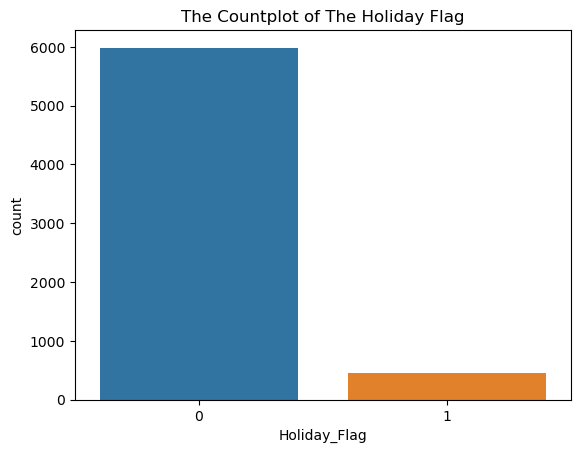

In [24]:
#Plot the countplot of the holiday flag.
sns.countplot(df['Holiday_Flag'])
plt.title('The Countplot of The Holiday Flag')        
plt.show()

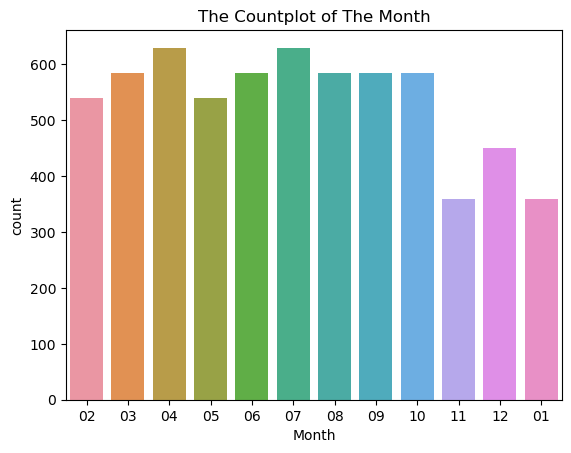

In [25]:
#Plot the countplot of the Month.
sns.countplot(df['Month'])
plt.title('The Countplot of The Month')        
plt.show()

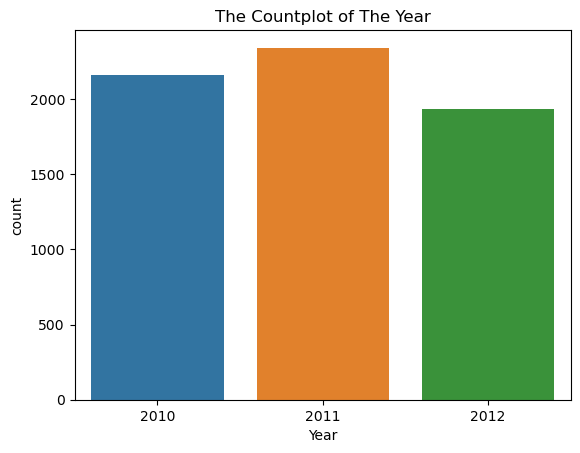

In [26]:
#Plot the countplot of the Month.
sns.countplot(df['Year'])
plt.title('The Countplot of The Year')        
plt.show()

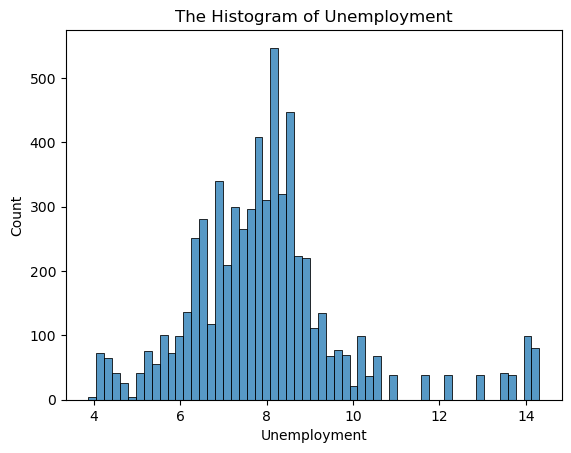

In [27]:
#Plot the count of Unemployment.
sns.histplot(df['Unemployment'])
plt.title('The Histogram of Unemployment')
plt.show()

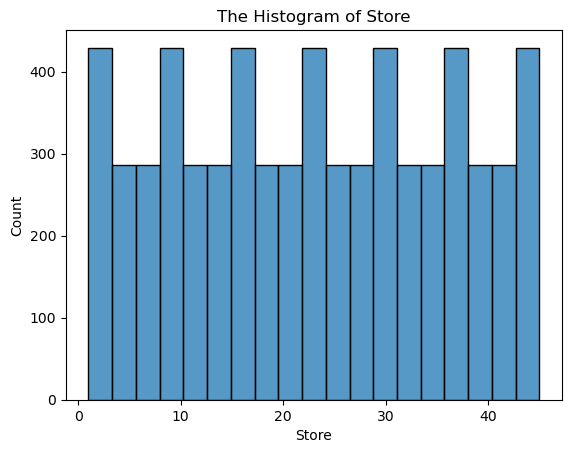

In [28]:
#Plot the count of Store.
sns.histplot(df['Store'])
plt.title('The Histogram of Store')
plt.show()

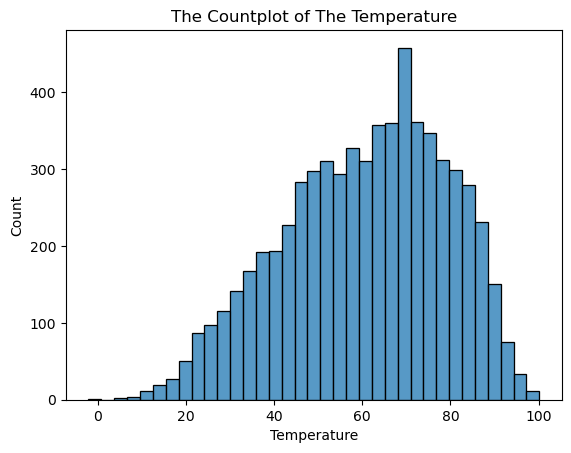

In [30]:
#Plot the histogram of the temperature.
sns.histplot(df['Temperature'])
plt.title('The Countplot of The Temperature')       
plt.show()

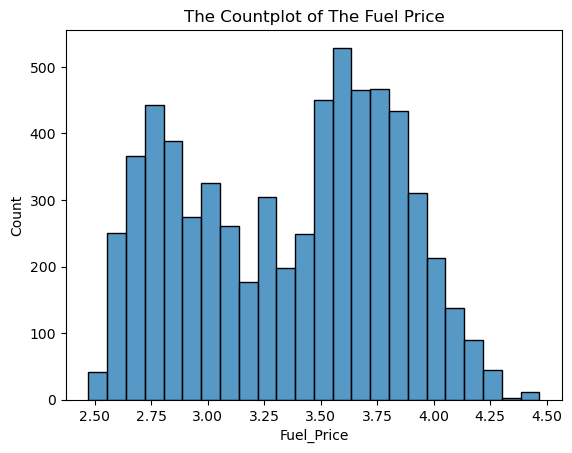

In [31]:
#Plot the histogram of the fuel price.
sns.histplot(df['Fuel_Price'])
plt.title('The Countplot of The Fuel Price')       
plt.show()

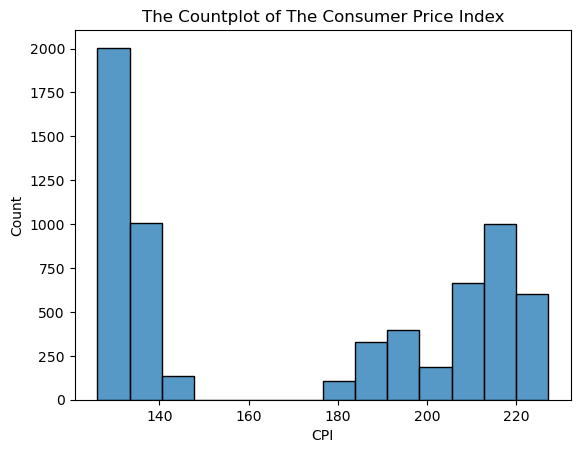

In [50]:
#Plot the histogram of the consumer price index.
sns.histplot(df['CPI'])
plt.title('The Countplot of The Consumer Price Index')       
plt.show()

Text(0, 0.5, 'Weekly_Sales')

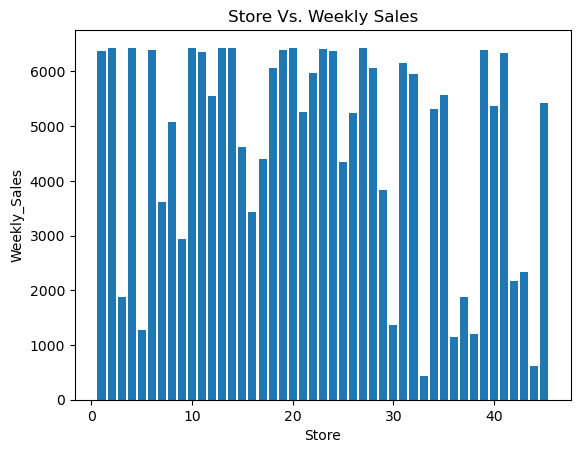

In [69]:
#Display the Store and Weekly Sales.
plt.bar(df['Store'], df['Weekly_Sales'])
plt.title('Store Vs. Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

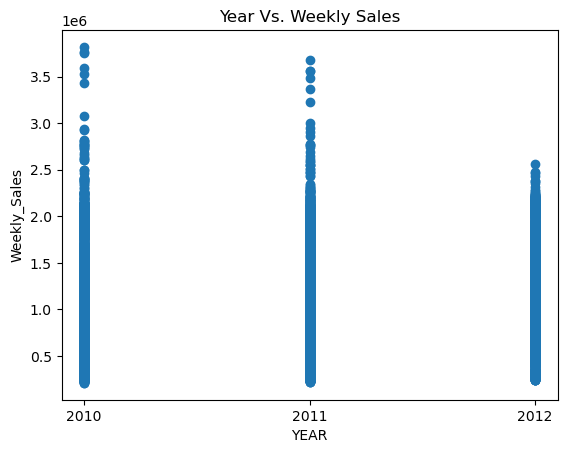

In [35]:
#Display theYear and Weekly Sales.
plt.scatter(df['Year'], df['Weekly_Sales'])
plt.title('Year Vs. Weekly Sales')
plt.xlabel('YEAR')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

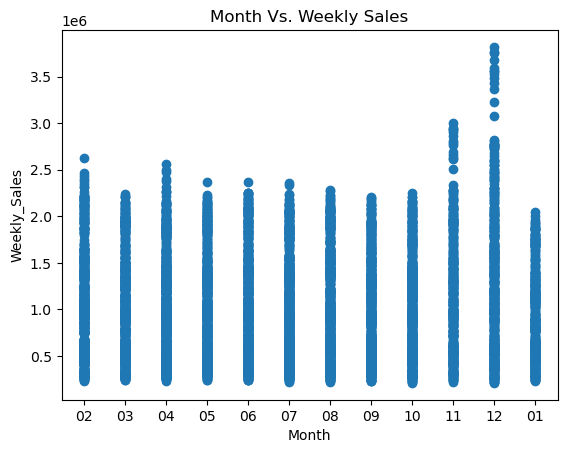

In [36]:
#Display the month and Weekly Sales.
plt.scatter(df['Month'], df['Weekly_Sales'])
plt.title('Month Vs. Weekly Sales')
plt.xlabel('Month')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

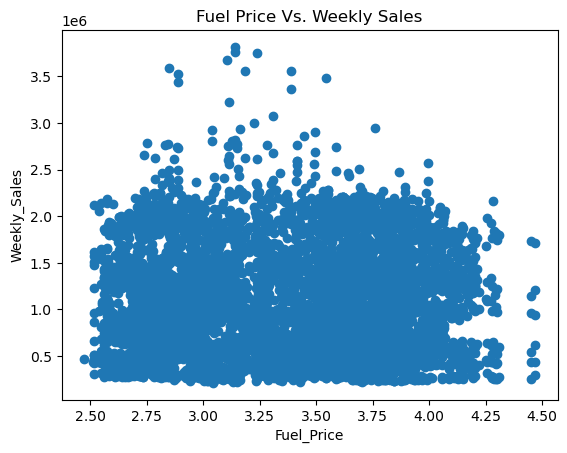

In [38]:
#Display the Fuel Price and Weekly Sales.
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'])
plt.title('Fuel Price Vs. Weekly Sales')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

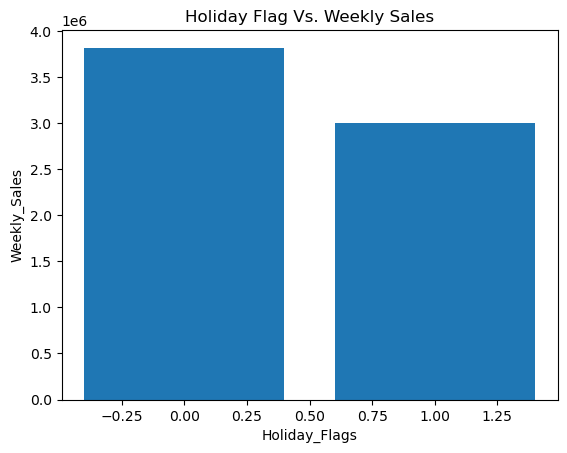

In [39]:
#Display the Holiday flag and Weekly Sales.
plt.bar(df['Holiday_Flag'], df['Weekly_Sales'])
plt.title('Holiday Flag Vs. Weekly Sales')
plt.xlabel('Holiday_Flags')
plt.ylabel('Weekly_Sales')

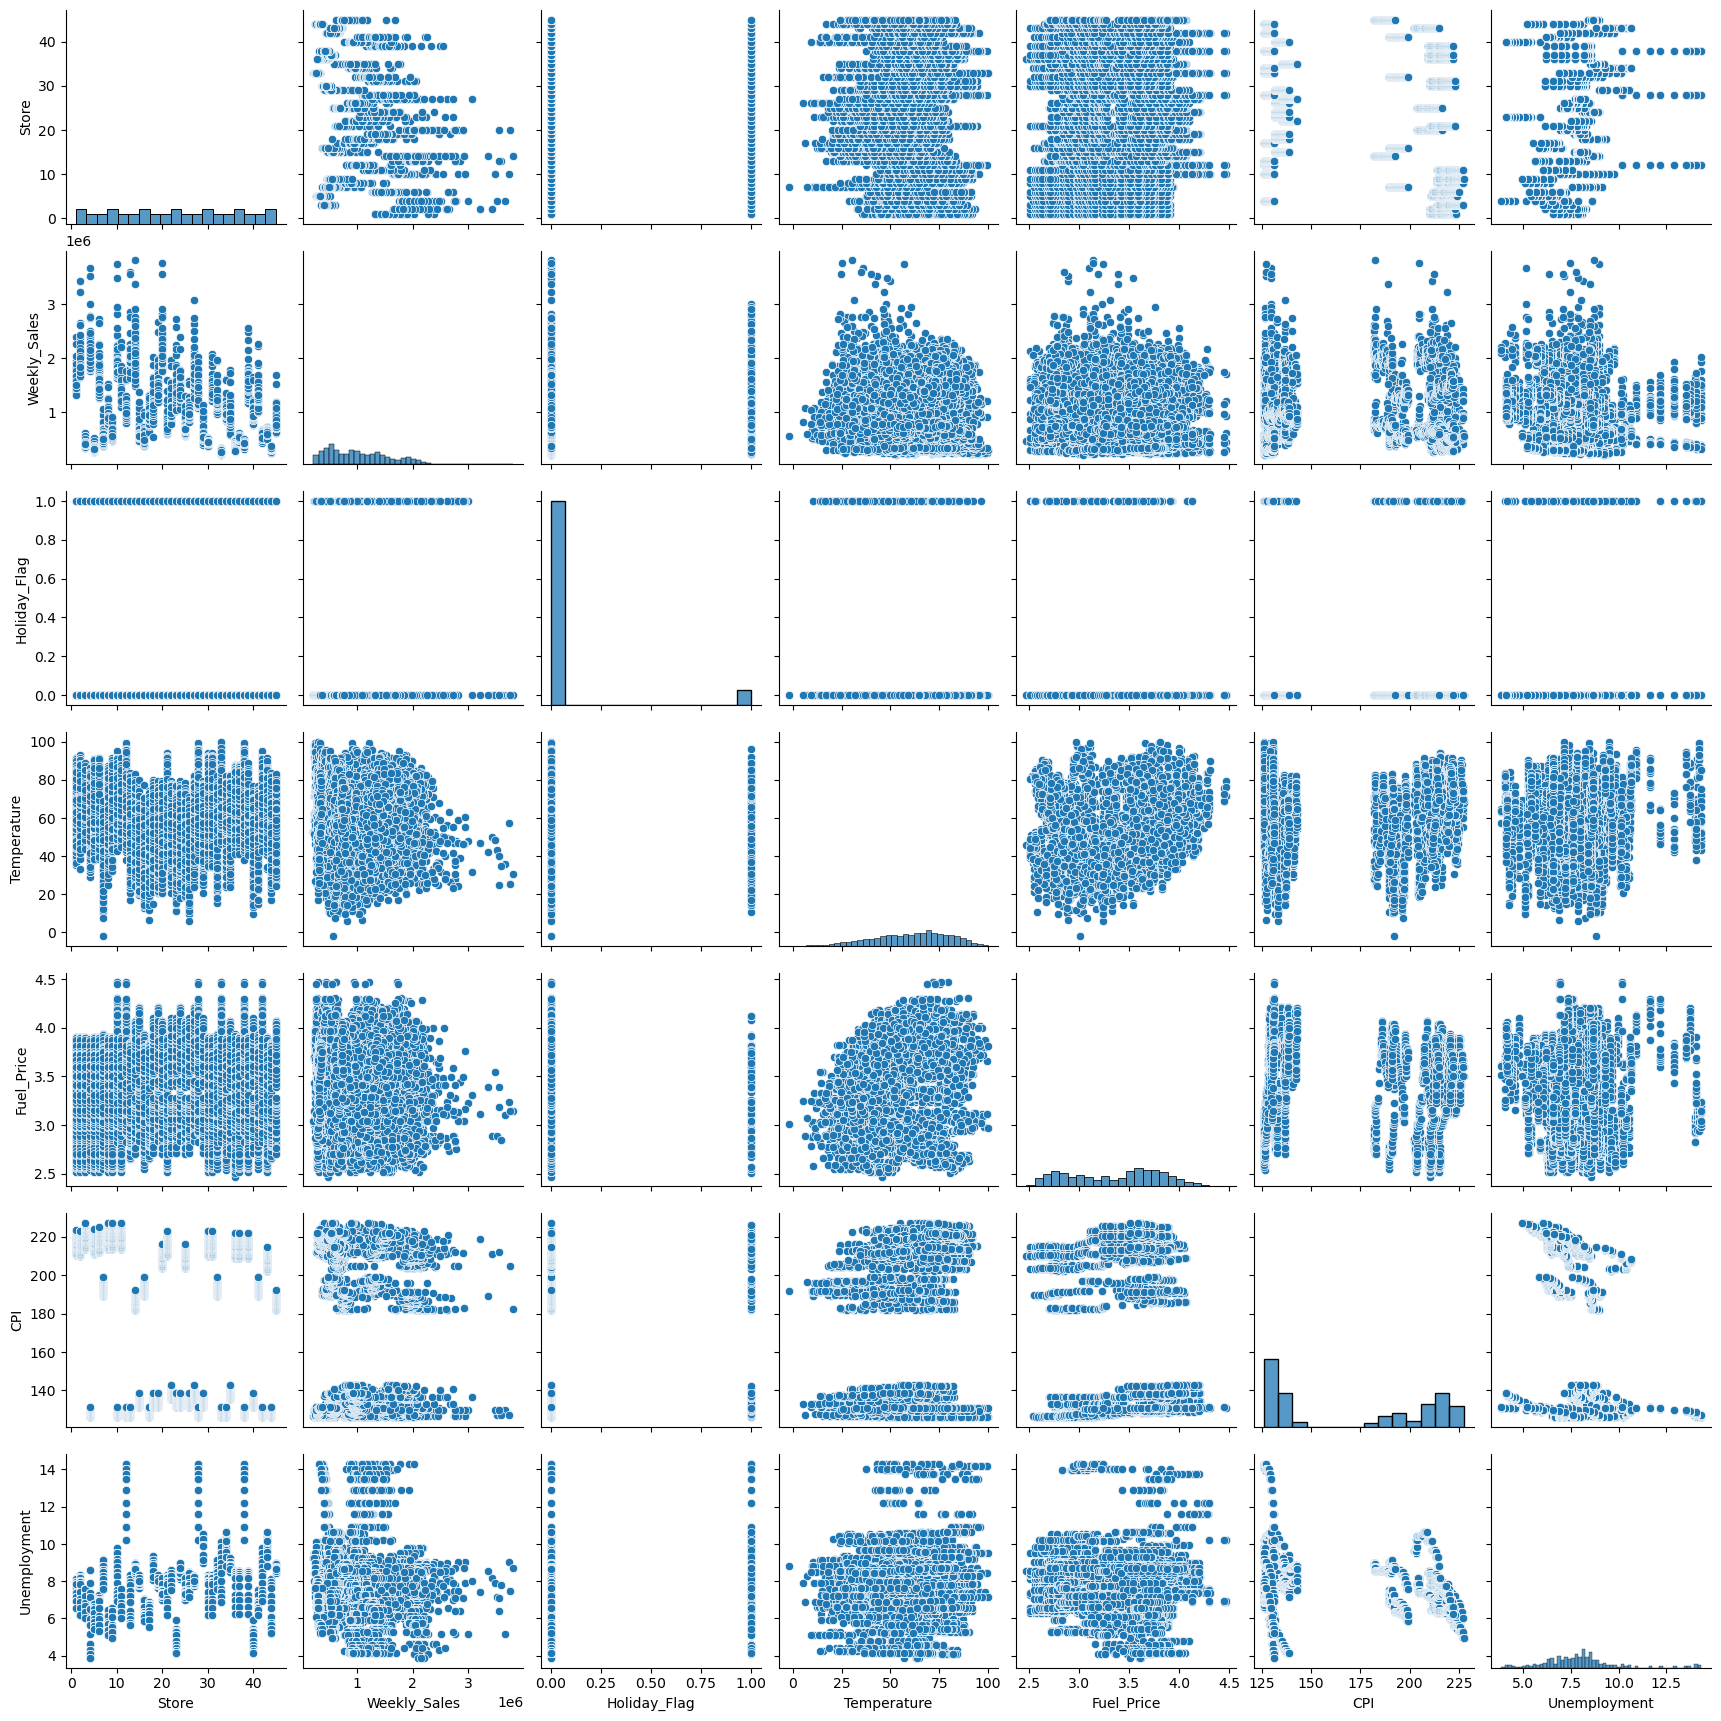

In [51]:
sns.pairplot(df)

In [52]:
#Use the label encoder to convert the column labels into numeric form.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Weekly_Sales'] = le.fit_transform(df['Weekly_Sales'])
df['Holiday_Flag'] = le.fit_transform(df['Holiday_Flag'])
df['Temperature'] = le.fit_transform(df['Temperature'])
df['Fuel_Price'] = le.fit_transform(df['Fuel_Price'])
df['CPI'] = le.fit_transform(df['CPI'])
df['Unemployment'] = le.fit_transform(df['Unemployment'])
df['Year'] = le.fit_transform(df['Year'])
df['Month'] = le.fit_transform(df['Month'])
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,5364,0,800,15,1003,216,0,1
1,1,5360,1,647,9,1022,216,0,1
2,1,5297,0,697,2,1027,216,0,1
3,1,4784,0,1009,11,1029,216,0,1
4,1,5190,0,1001,42,1033,216,0,2


<AxesSubplot:>

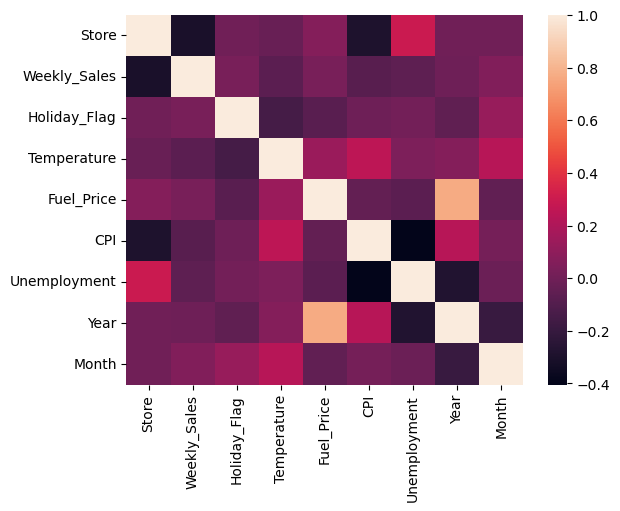

In [53]:
sns.heatmap(df.corr())

In [54]:
#SVC-DecisionTreeClassifier-LogisticRegression Models

In [55]:
#Import the sklearn modules and libraries.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [56]:
#Drop the holdiay flag feature.
y = df['Holiday_Flag'].copy()
X = df.drop('Holiday_Flag', axis = 1).copy()

In [57]:
#Use Standard Scaler to fit the model.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
#Split the data and scale it.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [59]:
#Train each model.
svm_model = SVC()
dec_model = DecisionTreeClassifier()
log_model = LogisticRegression()

In [60]:
#The models are trained
dec_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)

LogisticRegression()

In [77]:
print("Support Vector Machine Accuracy:", svm_model.score(X_test, y_test))
print("Decision Tree Accuracy:", dec_model.score(X_test, y_test))
print("Logistic Regression Accuracy:", log_model.score(X_test, y_test))

Support Vector Machine Accuracy: 0.9326773692387365
Decision Tree Accuracy: 0.9487312273433454
Logistic Regression Accuracy: 0.9326773692387365
